In [173]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

In [174]:
df_train = pd.read_csv('data/train.csv')
df_train.head()

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,1104,Acer,Aspire ES1-523,Notebook,15.6,1366x768,AMD A8-Series 7410 2.2GHz,4GB,500GB HDD,AMD Radeon R5,Windows 10,2.4kg,387.0
1,114,Dell,XPS 13,Ultrabook,13.3,Quad HD+ / Touchscreen 3200x1800,Intel Core i7 7560U 2.4GHz,8GB,256GB SSD,Intel Iris Plus Graphics 640,Windows 10,1.23kg,1379.0
2,172,Acer,Aspire A517-51G,Notebook,17.3,IPS Panel Full HD 1920x1080,Intel Core i5 8250U 1.6GHz,8GB,256GB SSD,Nvidia GeForce MX150,Windows 10,3kg,854.0
3,918,HP,Elitebook 820,Netbook,12.5,Full HD 1920x1080,Intel Core i7 7500U 2.7GHz,8GB,512GB SSD,Intel HD Graphics 620,Windows 10,1.26kg,1483.0
4,447,Lenovo,IdeaPad 320-15AST,Notebook,17.3,1600x900,AMD A6-Series 9220 2.5GHz,8GB,1TB HDD,AMD Radeon R4,Windows 10,2.8kg,519.0


In [175]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 912 entries, 0 to 911
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   laptop_ID         912 non-null    int64  
 1   Company           912 non-null    object 
 2   Product           912 non-null    object 
 3   TypeName          912 non-null    object 
 4   Inches            912 non-null    float64
 5   ScreenResolution  912 non-null    object 
 6   Cpu               912 non-null    object 
 7   Ram               912 non-null    object 
 8   Memory            912 non-null    object 
 9   Gpu               912 non-null    object 
 10  OpSys             912 non-null    object 
 11  Weight            912 non-null    object 
 12  Price_euros       912 non-null    float64
dtypes: float64(2), int64(1), object(10)
memory usage: 92.8+ KB


## Cleaning data

In [176]:
#Change 'Weight' to numeric by eliminating 'kg'
df_train['Weight'] = df_train['Weight'].replace('kg', '', regex=True)
df_train['Weight'] = df_train['Weight'].astype(float)


In [177]:
#Split Memory information into different columns
df_train[['Memory1', 'Memory2']] = df_train['Memory'].str.split(' + ', n=1, expand=True)
df_train[['Memory1_1', 'Memory1_2']] = df_train['Memory1'].str.split(' ', n=1, expand=True)
df_train[['Memory2_1', 'Memory2_2']] = df_train['Memory2'].str.split(' ', n=1, expand=True)

#Replace NaN values with 0
df_train.loc[:, ['Memory1_1', 'Memory1_2', 'Memory2_1', 'Memory2_2']] = df_train.loc[:, ['Memory1_1', 'Memory1_2', 'Memory2_1', 'Memory2_2']].fillna(0)

#Eliminate spaces, '+' from Memory columns
df_train.loc[:, ['Memory1_1', 'Memory1_2', 'Memory2_1', 'Memory2_2']] = df_train.loc[:, ['Memory1_1', 'Memory1_2', 'Memory2_1', 'Memory2_2']].replace(' ', '', regex=True)
df_train.loc[:, ['Memory1_1', 'Memory1_2', 'Memory2_1', 'Memory2_2']] = df_train.loc[:, ['Memory1_1', 'Memory1_2', 'Memory2_1', 'Memory2_2']].replace(r'\+', '', regex=True)

#Eliminate GB and transform TB to GB in Memory columns
df_train.loc[:, ['Memory1_1', 'Memory2_1']] = df_train.loc[:, ['Memory1_1', 'Memory2_1']].replace('GB', '', regex=True)
df_train.loc[:, ['Memory1_1', 'Memory2_1']] = df_train.loc[:, ['Memory1_1', 'Memory2_1']].replace('1.0TB', '1000', regex=True)
df_train.loc[:, ['Memory1_1', 'Memory2_1']] = df_train.loc[:, ['Memory1_1', 'Memory2_1']].replace('TB', '000', regex=True)

#Drop old columns
df_train1 = df_train.drop(['Memory', 'Memory1', 'Memory2'], axis=1)
df_train1['Memory1_1'].unique()

array(['500', '256', '512', '1000', '128', '32', '64', '180', '2000',
       '16', '508'], dtype=object)

In [178]:
#Remove GB in Ram column
df_train1['Ram'] = df_train1['Ram'].replace('GB', '', regex=True)
df_train1['Ram'] = df_train1['Ram'].astype(int)
df_train1['Ram'].unique()

array([ 4,  8, 16,  6, 32, 12,  2, 24])

In [179]:
#Change Resolution column to numeric values
import re
df_train1['Resolution1'] = df_train1['ScreenResolution'].apply(lambda x: [int(n) for n in re.findall(r'\d+', x)])
df_train1['Resolution1'] = df_train1['Resolution1'].apply(lambda x: [int(x[0]) * int(x[1])][0])

df_train1['Resolution1'].unique()

array([1049088, 5760000, 2073600, 1440000, 3317760,   15360, 3686400,
       1296000, 3393024, 5184000, 4096000, 3840000, 2304000, 3110400],
      dtype=int64)

In [180]:
df_train1.head()

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Gpu,OpSys,Weight,Price_euros,Memory1_1,Memory1_2,Memory2_1,Memory2_2,Resolution1
0,1104,Acer,Aspire ES1-523,Notebook,15.6,1366x768,AMD A8-Series 7410 2.2GHz,4,AMD Radeon R5,Windows 10,2.40,387.0,500,HDD,0,0,1049088
1,114,Dell,XPS 13,Ultrabook,13.3,Quad HD+ / Touchscreen 3200x1800,Intel Core i7 7560U 2.4GHz,8,Intel Iris Plus Graphics 640,Windows 10,1.23,1379.0,256,SSD,0,0,5760000
2,172,Acer,Aspire A517-51G,Notebook,17.3,IPS Panel Full HD 1920x1080,Intel Core i5 8250U 1.6GHz,8,Nvidia GeForce MX150,Windows 10,3.00,854.0,256,SSD,0,0,2073600
3,918,HP,Elitebook 820,Netbook,12.5,Full HD 1920x1080,Intel Core i7 7500U 2.7GHz,8,Intel HD Graphics 620,Windows 10,1.26,1483.0,512,SSD,0,0,2073600
4,447,Lenovo,IdeaPad 320-15AST,Notebook,17.3,1600x900,AMD A6-Series 9220 2.5GHz,8,AMD Radeon R4,Windows 10,2.80,519.0,1000,HDD,0,0,1440000


In [181]:
#Split Gpu and Cpu information into different columns
df_train1['Gpu'] = df_train1['Gpu'].str.split().str[:2].str.join(' ')
df_train1[['Gpu1', 'Gpu2']] = df_train1['Gpu'].str.split(' ', n=1, expand=True)

df_train1['Cpu'] = df_train1['Cpu'].str.split().str[:3].str.join(' ')
df_train1[['Cpu1', 'Cpu2', 'Cpu3']] = df_train1['Cpu'].str.split(' ', n=2, expand=True)

#Remove unnecessary columns
df_train2 = df_train1.drop(['ScreenResolution', 'Product', 'Cpu', 'Gpu', 'Memory2_2'], axis=1)
df_train2.head()

,laptop_ID,Company,TypeName,Inches,Ram,OpSys,Weight,Price_euros,Memory1_1,Memory1_2,Memory2_1,Resolution1,Gpu1,Gpu2,Cpu1,Cpu2,Cpu3
0,1104,Acer,Notebook,15.6,4,Windows 10,2.40,387.0,500,HDD,0,1049088,AMD,Radeon,AMD,A8-Series,7410
1,114,Dell,Ultrabook,13.3,8,Windows 10,1.23,1379.0,256,SSD,0,5760000,Intel,Iris,Intel,Core,i7
2,172,Acer,Notebook,17.3,8,Windows 10,3.00,854.0,256,SSD,0,2073600,Nvidia,GeForce,Intel,Core,i5
3,918,HP,Netbook,12.5,8,Windows 10,1.26,1483.0,512,SSD,0,2073600,Intel,HD,Intel,Core,i7
4,447,Lenovo,Notebook,17.3,8,Windows 10,2.80,519.0,1000,HDD,0,1440000,AMD,Radeon,AMD,A6-Series,9220


### Functions

In [182]:
def assign_numeric_values(df: pd.DataFrame, column: str, dic: dict[str, int]) -> Tuple[pd.DataFrame, Dict[str, int]]:
    '''
    Assigns numerical values to a column in a Pandas DataFrame based on a dictionary of values.

    Args:
    df (DataFrame): The DataFrame containing the column to be transformed.
    column (str): The name of the column to be transformed.
    dic (Dict[str, int]): A dictionary of unique values in the column and their corresponding numeric values.

    Returns:
    A tuple containing the transformed DataFrame and the updated dictionary of unique values and their corresponding numeric values.
    '''

    le = LabelEncoder()

    # Add unique values to dictionary
    unique_values = df[column].unique()
    new_values = [value for value in unique_values if value not in dic]
    for i, value in enumerate(new_values):
        dic[value] = le.fit_transform([value])[0] + len(dic)

    # Assign numerical values to column in DataFrame
    df[column] = df[column].apply(lambda x: dic.get(x, x))

    return df, dic


#### Dictionaries

In [183]:
Company_dic = dict()
OpSys_dic = dict()
TypeName_dic = dict()
Memory_dic = dict()
Brand_dic = dict()
Model_dic = dict()
Series_dic = dict()


In [184]:
assign_numeric_values(df_train2, 'Company', Company_dic)
assign_numeric_values(df_train2, 'TypeName', TypeName_dic)
assign_numeric_values(df_train2, 'OpSys', OpSys_dic)
assign_numeric_values(df_train2, 'Memory1_2', Memory_dic)
#assign_numeric_values(df_train2, 'Memory2_2', Memory_dic)
assign_numeric_values(df_train2, 'Gpu1', Brand_dic)
assign_numeric_values(df_train2, 'Cpu1', Brand_dic)
assign_numeric_values(df_train2, 'Gpu2', Model_dic)
assign_numeric_values(df_train2, 'Cpu2', Model_dic)
assign_numeric_values(df_train2, 'Cpu3', Series_dic)
df_train2.head()

,laptop_ID,Company,TypeName,Inches,Ram,OpSys,Weight,Price_euros,Memory1_1,Memory1_2,Memory2_1,Resolution1,Gpu1,Gpu2,Cpu1,Cpu2,Cpu3
0,1104,0,0,15.6,4,0,2.40,387.0,500,0,0,1049088,0,0,0,11,0
1,114,1,1,13.3,8,0,1.23,1379.0,256,1,0,5760000,1,1,1,12,1
2,172,0,0,17.3,8,0,3.00,854.0,256,1,0,2073600,2,2,1,12,2
3,918,2,2,12.5,8,0,1.26,1483.0,512,1,0,2073600,1,3,1,12,1
4,447,3,0,17.3,8,0,2.80,519.0,1000,0,0,1440000,0,0,0,13,3


In [185]:
df_train2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 912 entries, 0 to 911
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   laptop_ID    912 non-null    int64  
 1   Company      912 non-null    int64  
 2   TypeName     912 non-null    int64  
 3   Inches       912 non-null    float64
 4   Ram          912 non-null    int32  
 5   OpSys        912 non-null    int64  
 6   Weight       912 non-null    float64
 7   Price_euros  912 non-null    float64
 8   Memory1_1    912 non-null    object 
 9   Memory1_2    912 non-null    int64  
 10  Memory2_1    912 non-null    object 
 11  Resolution1  912 non-null    int64  
 12  Gpu1         912 non-null    int64  
 13  Gpu2         912 non-null    int64  
 14  Cpu1         912 non-null    int64  
 15  Cpu2         912 non-null    int64  
 16  Cpu3         912 non-null    int64  
dtypes: float64(3), int32(1), int64(11), object(2)
memory usage: 117.7+ KB


In [186]:
train2 = df_train2

In [187]:
train2.to_csv('data/train2.csv', index=False)

# Univariate analysis

In [188]:
train2.describe()

,laptop_ID,Company,TypeName,Inches,Ram,OpSys,Weight,Price_euros,Memory1_2,Resolution1,Gpu1,Gpu2,Cpu1,Cpu2,Cpu3
count,912.000000,912.000000,912.000000,912.000000,912.000000,912.000000,912.000000,912.000000,912.000000,9.120000e+02,912.000000,912.000000,912.000000,912.000000,912.000000
mean,669.402412,3.098684,1.110746,14.982785,8.269737,0.520833,2.021819,1116.964013,0.838816,1.881740e+06,1.160088,2.450658,0.955044,12.539474,2.848684
std,379.372130,3.031325,1.527578,1.417299,4.822382,1.365083,0.653525,681.619330,0.705402,8.967484e+05,0.639555,1.238683,0.207322,1.548548,3.370160
min,1.000000,0.000000,0.000000,10.100000,2.000000,0.000000,0.690000,191.900000,0.000000,1.536000e+04,0.000000,0.000000,0.000000,11.000000,0.000000
25%,345.750000,1.000000,0.000000,14.000000,4.000000,0.000000,1.500000,598.000000,0.000000,1.049088e+06,1.000000,2.000000,1.000000,12.000000,1.000000
50%,676.500000,2.000000,0.000000,15.600000,8.000000,0.000000,2.040000,979.000000,1.000000,2.073600e+06,1.000000,3.000000,1.000000,12.000000,2.000000
75%,993.000000,3.000000,3.000000,15.600000,8.000000,0.000000,2.300000,1476.332500,1.000000,2.073600e+06,2.000000,3.000000,1.000000,12.000000,4.000000
max,1318.000000,18.000000,5.000000,18.400000,32.000000,8.000000,4.600000,5499.000000,3.000000,5.760000e+06,2.000000,10.000000,1.000000,23.000000,28.000000


In [189]:
import statistics
mean_price = statistics.mean(train2['Price_euros'])
mode_price = statistics.mode(train2['Price_euros'])
median_price = statistics.median(train2['Price_euros'])
std_dv_price = statistics.stdev(train2['Price_euros'])

print( f'Mean value:', mean_price
      , f'Mode value:', mode_price
      , f'Median value:', median_price
      , f'Standard deviation:', std_dv_price)

Mean value: 1116.9640131578947 Mode value: 1099.0 Median value: 979.0 Standard deviation: 681.619330408968


C:\Users\crist\AppData\Local\Temp\ipykernel_4720\2449792958.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train2['Price_euros']);


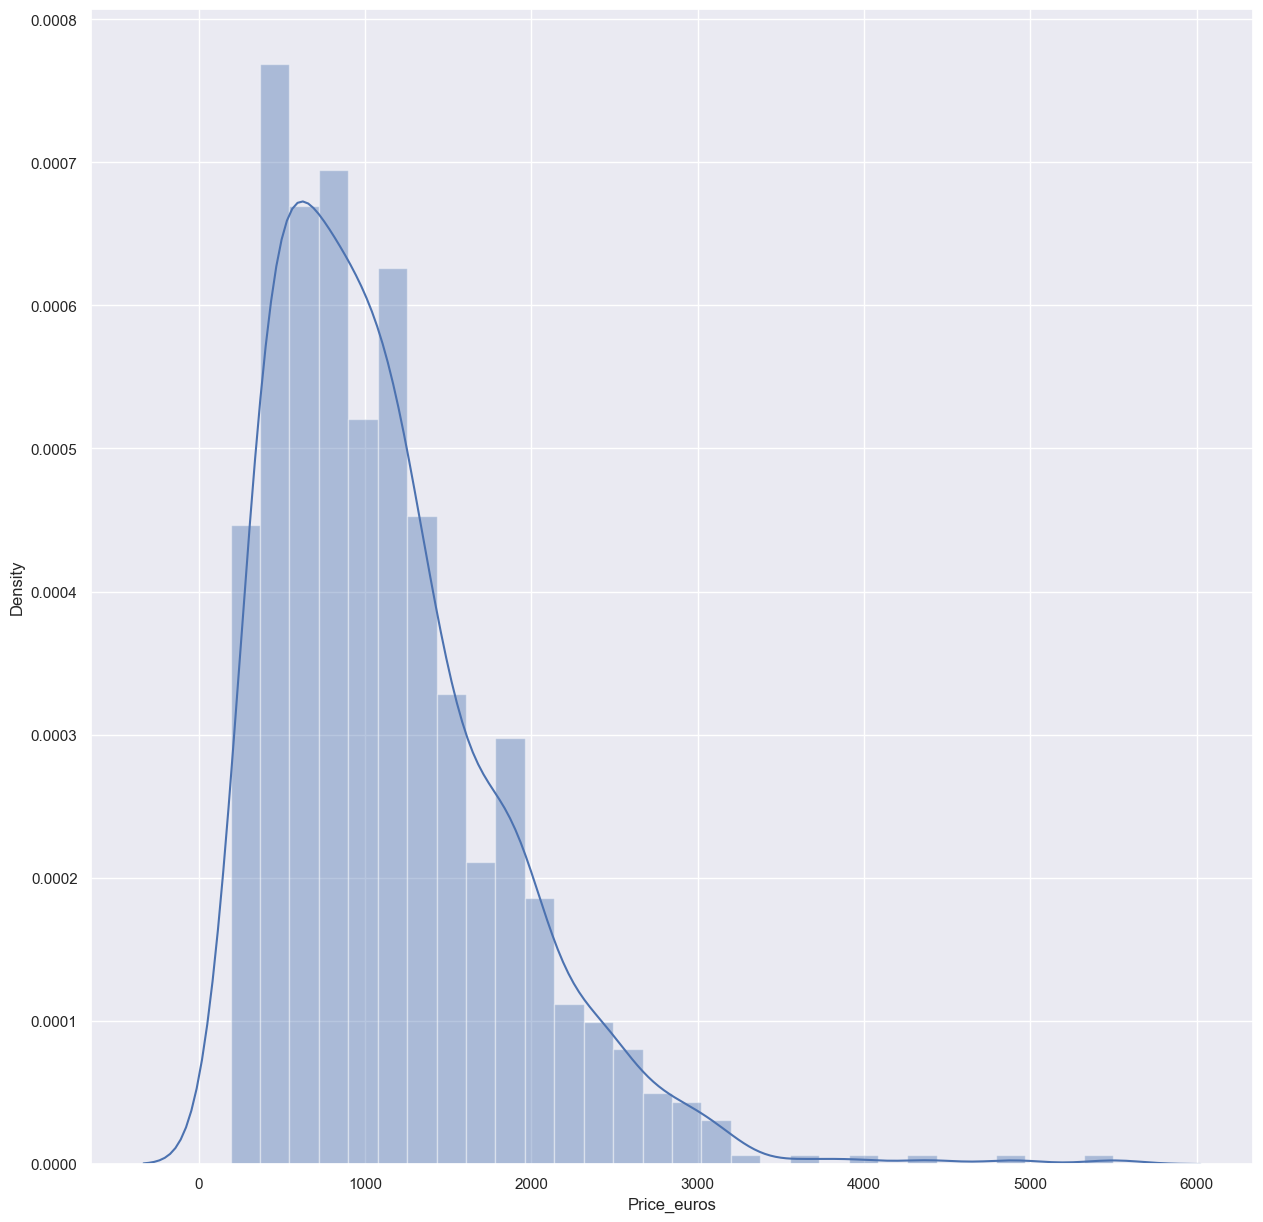

In [190]:
sns.distplot(train2['Price_euros']);

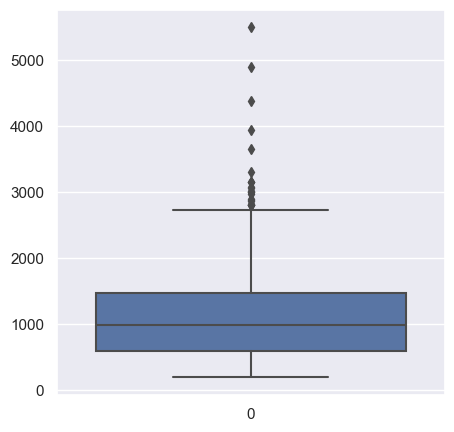

In [191]:
sns.set(rc={'figure.figsize':(5, 5)})
sns.boxplot(train2['Price_euros']);

C:\Users\crist\AppData\Local\Temp\ipykernel_4720\352713634.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train2['Company'], color="olive", ax=axes[0, 0])
C:\Users\crist\AppData\Local\Temp\ipykernel_4720\352713634.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train2['TypeName'], color

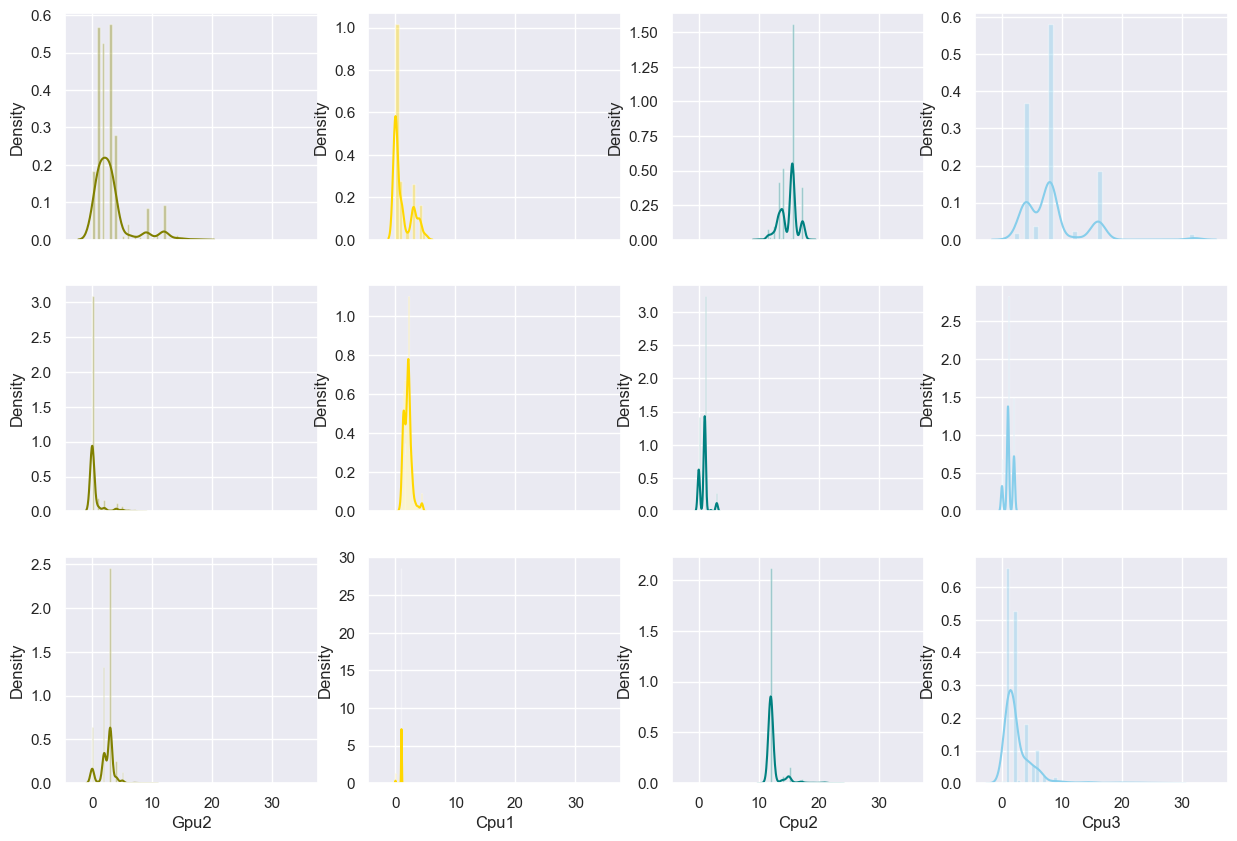

In [192]:
f, axes = plt.subplots(3, 4, figsize=(15,10), sharex=True)
sns.distplot(train2['Company'], color="olive", ax=axes[0, 0])
sns.distplot(train2['TypeName'], color="gold", ax=axes[0, 1])
sns.distplot(train2['Inches'] , color="teal", ax=axes[0, 2])
sns.distplot(train2['Ram'] , color="skyblue", ax=axes[0, 3])
sns.distplot(train2['OpSys'] , color="olive", ax=axes[1, 0])
sns.distplot(train2['Weight'] , color="gold", ax=axes[1, 1])
sns.distplot(train2['Memory1_2'] , color="teal", ax=axes[1, 2])
#sns.distplot(train2['Memory2_2'] , color="skyblue", ax=axes[1, 3])
sns.distplot(train2['Gpu1'] , color="skyblue", ax=axes[1, 3])
sns.distplot(train2['Gpu2'] , color="olive", ax=axes[2, 0])
sns.distplot(train2['Cpu1'] , color="gold", ax=axes[2, 1])
sns.distplot(train2['Cpu2'] , color="teal", ax=axes[2, 2])
sns.distplot(train2['Cpu3'] , color="skyblue", ax=axes[2, 3]);

# Bivariate analysis

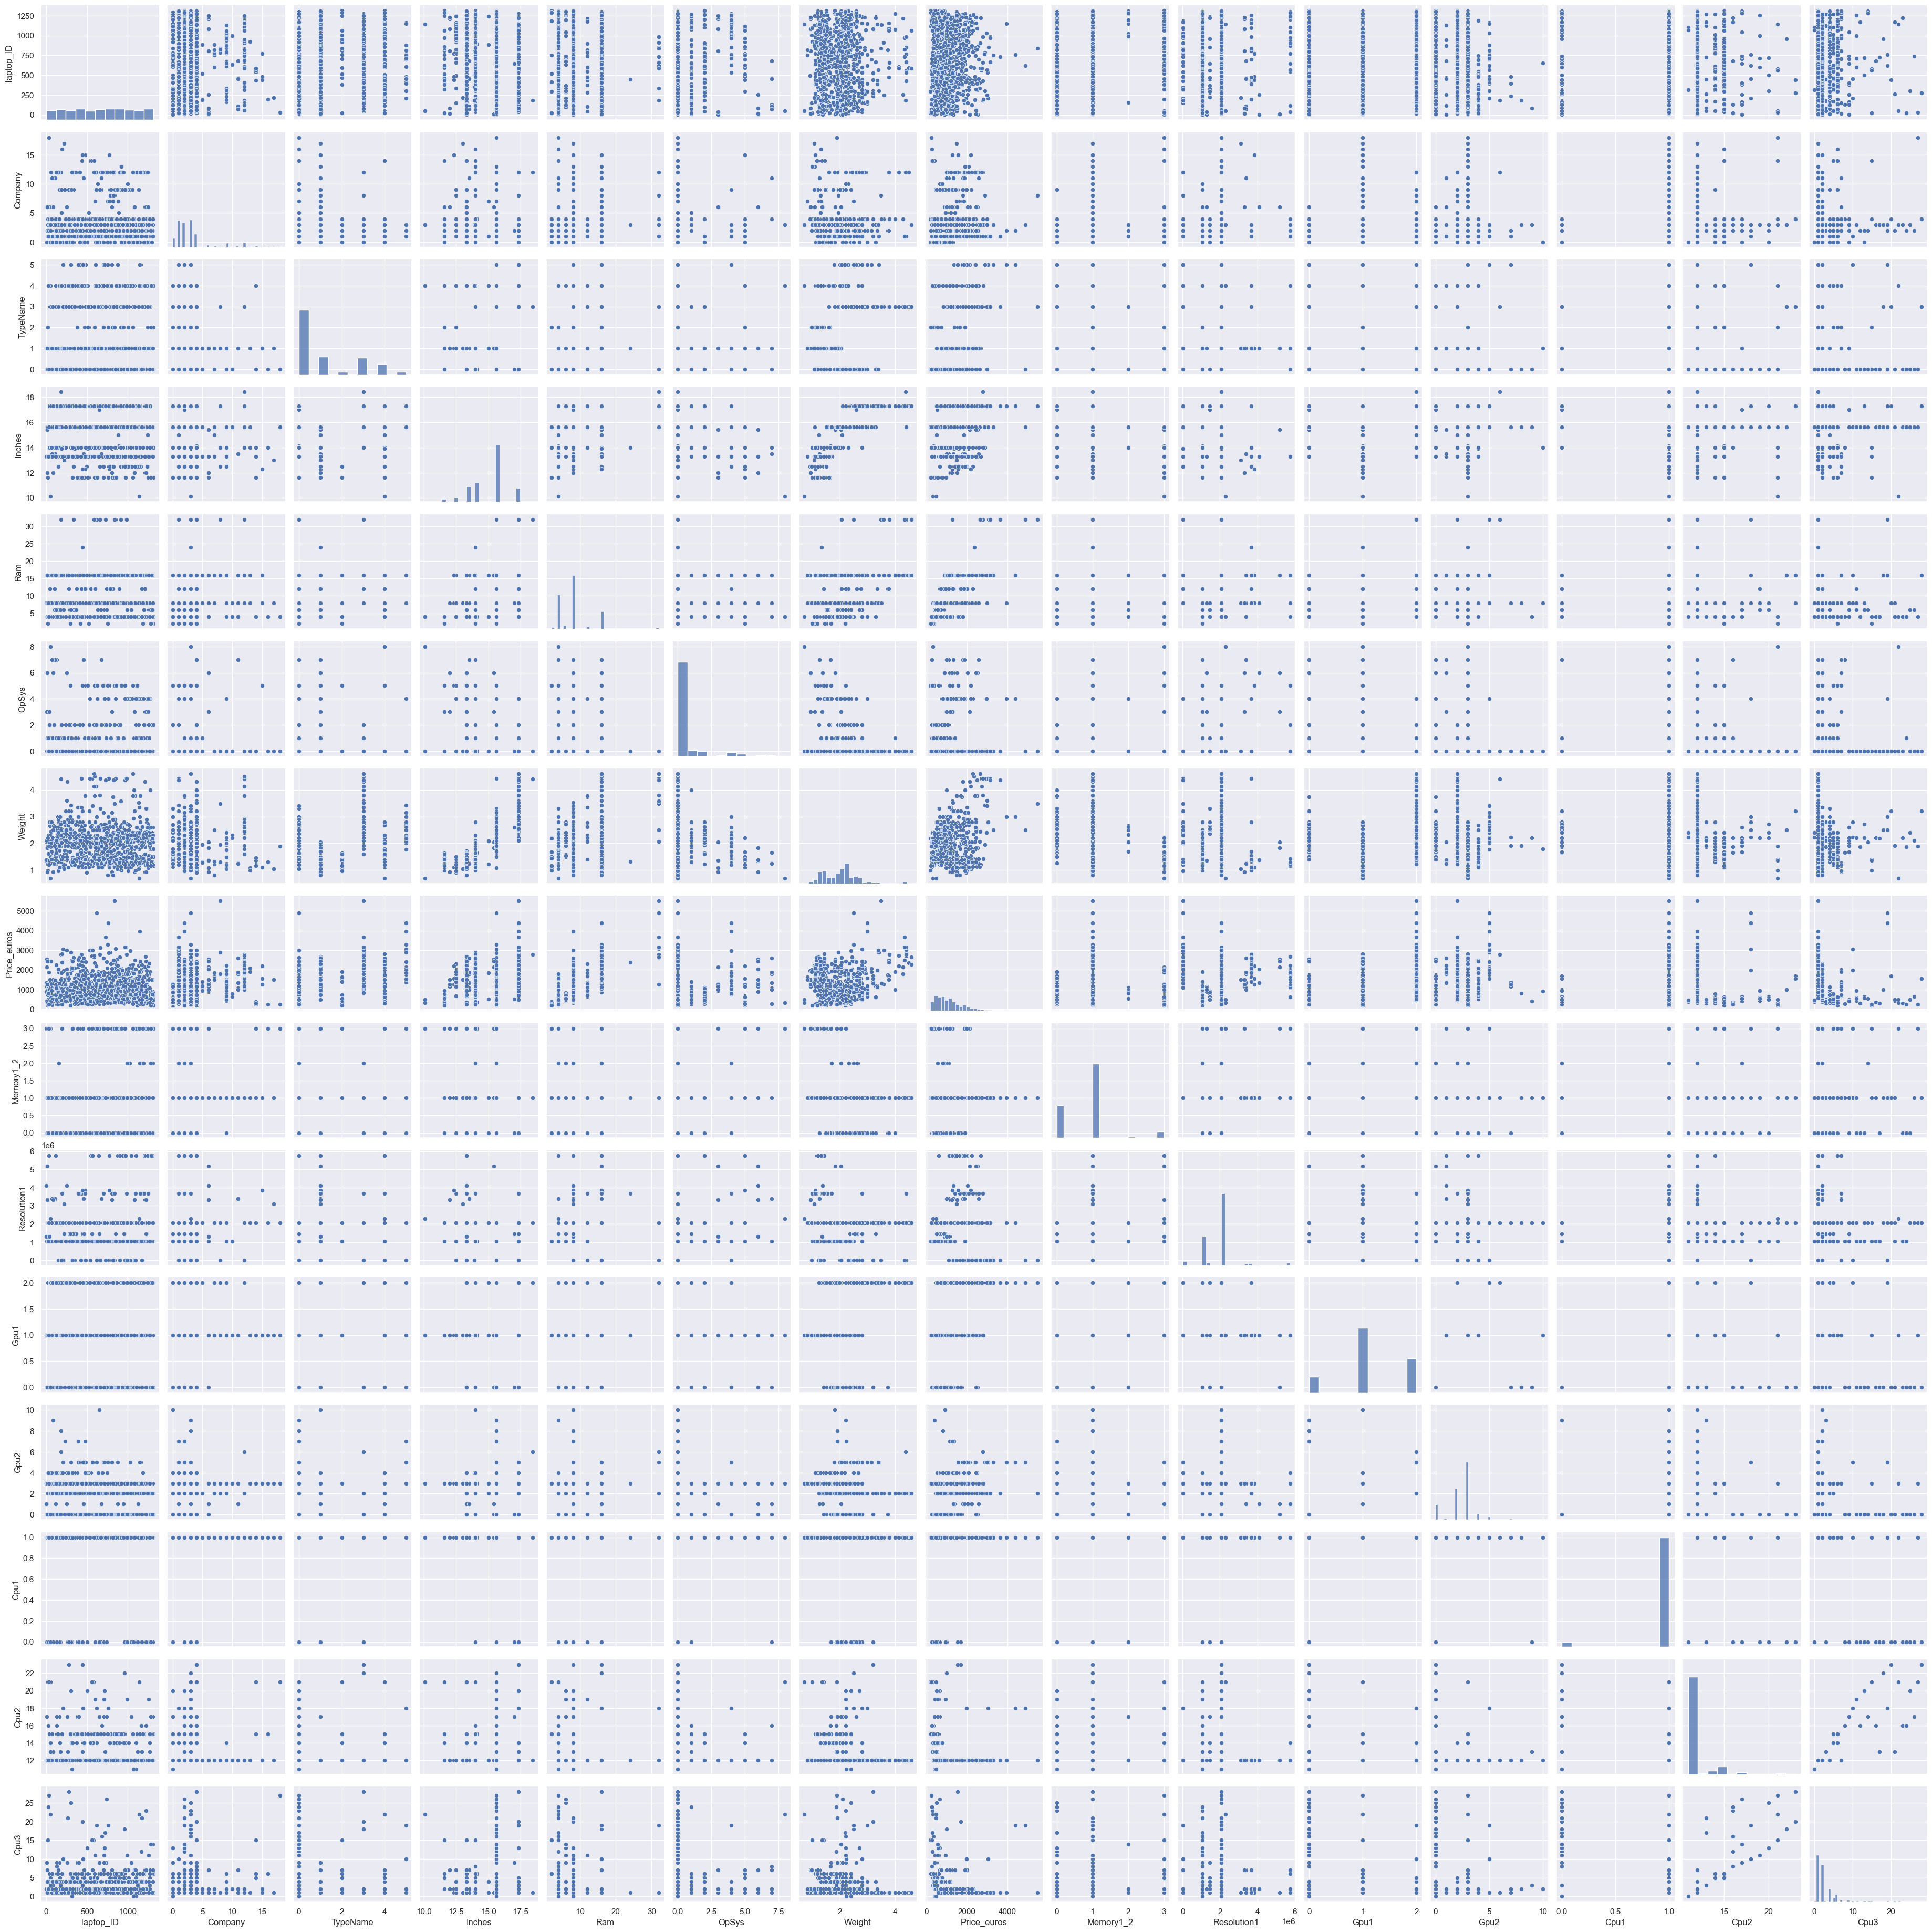

In [193]:
sns.set(rc={'figure.figsize':(20, 20)})
sns.pairplot(train2);

In [194]:
#Displaying correlation among all the columns 
train2.corr()

,laptop_ID,Company,TypeName,Inches,Ram,OpSys,Weight,Price_euros,Memory1_1,Memory1_2,Memory2_1,Resolution1,Gpu1,Gpu2,Cpu1,Cpu2,Cpu3
laptop_ID,1.000000,0.007946,0.068510,-0.076871,-0.039207,0.002124,-0.007465,0.056520,-0.000884,-0.003334,-0.037022,-0.019492,0.007158,-0.008513,0.007571,-0.005533,-0.007514
Company,0.007946,1.000000,0.129676,-0.003922,0.171637,0.089695,-0.037768,0.209893,-0.175729,0.167098,0.209016,0.116570,0.198506,0.026732,0.062960,0.032609,-0.002727
TypeName,0.068510,0.129676,1.000000,-0.033544,0.399460,-0.037166,0.166361,0.485474,-0.150963,0.178555,0.300907,0.169255,0.369465,0.187079,0.123185,-0.063799,-0.144290
Inches,-0.076871,-0.003922,-0.033544,1.000000,0.240013,-0.238249,0.836905,0.054903,0.265360,-0.392661,0.378987,-0.174302,0.248875,-0.290136,-0.119192,-0.065184,-0.067214
Ram,-0.039207,0.171637,0.399460,0.240013,1.000000,-0.100070,0.375818,0.743057,-0.005094,0.088950,0.421910,0.168593,0.351861,-0.031031,0.102173,-0.187961,-0.260086
OpSys,0.002124,0.089695,-0.037166,-0.238249,-0.100070,1.000000,-0.193644,-0.007049,-0.086957,0.236611,-0.133914,0.108981,-0.094351,0.023330,0.047917,0.069972,0.086582
Weight,-0.007465,-0.037768,0.166361,0.836905,0.375818,-0.193644,1.000000,0.183293,0.176336,-0.275884,0.459839,-0.186963,0.352275,-0.241927,-0.055864,-0.047828,-0.082100
Price_euros,0.056520,0.209893,0.485474,0.054903,0.743057,-0.007049,0.183293,1.000000,-0.148633,0.149439,0.299199,0.249818,0.360038,0.159967,0.186696,-0.257305,-0.315034
Memory1_1,-0.000884,-0.175729,-0.150963,0.265360,-0.005094,-0.086957,0.176336,-0.148633,1.000000,-0.621657,-0.238321,-0.121384,-0.065292,-0.136369,-0.098708,-0.021978,0.018817
Memory1_2,-0.003334,0.167098,0.178555,-0.392661,0.088950,0.236611,-0.275884,0.149439,-0.621657,1.000000,0.096107,0.139244,0.030494,0.113375,0.077997,0.211332,0.127789


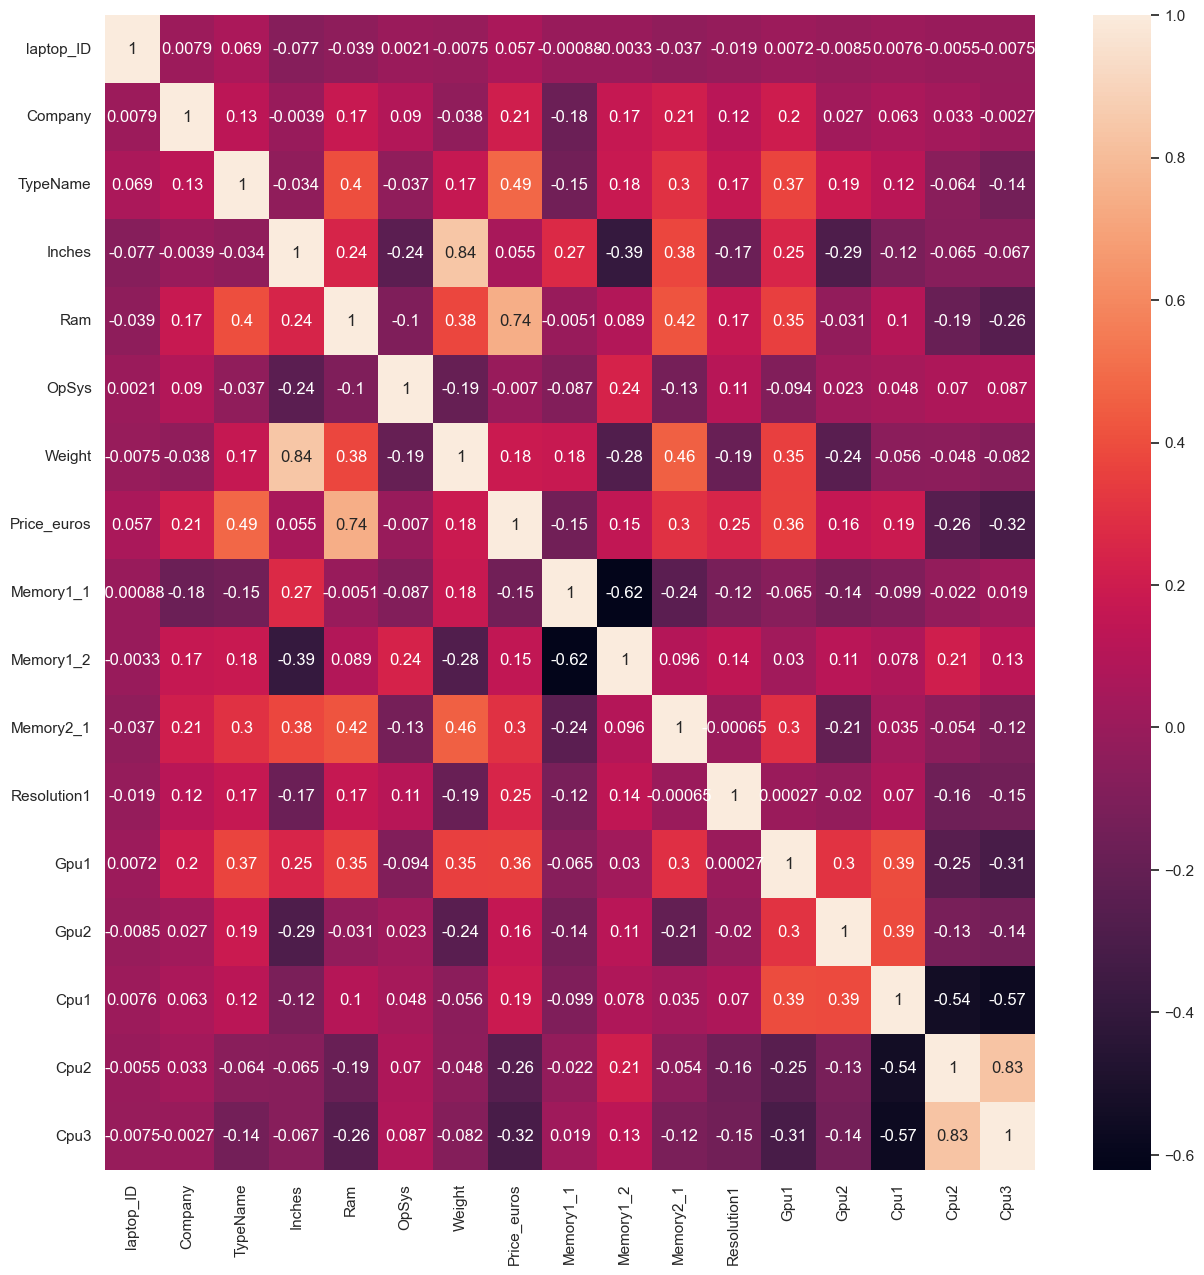

In [195]:
sns.set(rc={'figure.figsize':(15, 15)})
sns.heatmap(train2.corr(), annot=True);

# TEST DATAFRAME

In [196]:
df_test = pd.read_csv('data/test.csv')
df_test.head()

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight
0,750,Toshiba,Tecra X40-D-10G,Notebook,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,Windows 10,1.25kg
1,726,Mediacom,Smartbook 142,Notebook,14.0,IPS Panel Full HD 1920x1200,Intel Atom Z8350 1.92GHz,4GB,32GB HDD,Intel HD Graphics 400,Windows 10,1.4kg
2,633,Mediacom,SmartBook 140,Notebook,14.0,Full HD 1920x1080,Intel Atom x5-Z8350 1.44GHz,2GB,32GB Flash Storage,Intel HD Graphics,Windows 10,1.4kg
3,363,Dell,Inspiron 7577,Gaming,15.6,Full HD 1920x1080,Intel Core i5 7300HQ 2.5GHz,8GB,1TB HDD,Nvidia GeForce GTX 1050,Windows 10,2.65kg
4,319,Asus,VivoBook Flip,2 in 1 Convertible,11.6,Touchscreen 1366x768,Intel Celeron Dual Core N3350 1.1GHz,2GB,32GB Flash Storage,Intel HD Graphics 500,Windows 10,1.1kg


In [197]:
#Change 'Weight' to numeric by eliminating 'kg'
df_test['Weight'] = df_test['Weight'].replace('kg', '', regex=True)
df_test['Weight'] = df_test['Weight'].astype(float)

#Split Memory information into different columns
df_test[['Memory1', 'Memory2']] = df_test['Memory'].str.split(' + ', n=1, expand=True)
df_test[['Memory1_1', 'Memory1_2']] = df_test['Memory1'].str.split(' ', n=1, expand=True)
df_test[['Memory2_1', 'Memory2_2']] = df_test['Memory2'].str.split(' ', n=1, expand=True)

#Replace NaN values with 0
df_test.loc[:, ['Memory1_1', 'Memory1_2', 'Memory2_1', 'Memory2_2']] = df_test.loc[:, ['Memory1_1', 'Memory1_2', 'Memory2_1', 'Memory2_2']].fillna(0)

#Eliminate spaces, '+' from Memory columns
df_test.loc[:, ['Memory1_1', 'Memory1_2', 'Memory2_1', 'Memory2_2']] = df_test.loc[:, ['Memory1_1', 'Memory1_2', 'Memory2_1', 'Memory2_2']].replace(' ', '', regex=True)
df_test.loc[:, ['Memory1_1', 'Memory1_2', 'Memory2_1', 'Memory2_2']] = df_test.loc[:, ['Memory1_1', 'Memory1_2', 'Memory2_1', 'Memory2_2']].replace(r'\+', '', regex=True)

#Eliminate GB and transform TB to GB in Memory columns
df_test.loc[:, ['Memory1_1', 'Memory2_1']] = df_test.loc[:, ['Memory1_1', 'Memory2_1']].replace('GB', '', regex=True)
df_test.loc[:, ['Memory1_1', 'Memory2_1']] = df_test.loc[:, ['Memory1_1', 'Memory2_1']].replace('1.0TB', '1000', regex=True)
df_test.loc[:, ['Memory1_1', 'Memory2_1']] = df_test.loc[:, ['Memory1_1', 'Memory2_1']].replace('TB', '000', regex=True)

#Drop old columns
df_test1 = df_test.drop(['Memory', 'Memory1', 'Memory2'], axis=1)
df_test1['Memory1_1'].unique()

#Remove GB in Ram column
df_test1['Ram'] = df_test1['Ram'].replace('GB', '', regex=True)
df_test1['Ram'] = df_test1['Ram'].astype(int)
df_test1['Ram'].unique()

#Change Resolution column to numeric values
import re
df_test1['Resolution1'] = df_test1['ScreenResolution'].apply(lambda x: [int(n) for n in re.findall(r'\d+', x)])
df_test1['Resolution1'] = df_test1['Resolution1'].apply(lambda x: [int(x[0]) * int(x[1])][0])

df_test1['Resolution1'].unique()

#Split Gpu and Cpu information into different columns
df_test1['Gpu'] = df_test1['Gpu'].str.split().str[:2].str.join(' ')
df_test1[['Gpu1', 'Gpu2']] = df_test1['Gpu'].str.split(' ', n=1, expand=True)

df_test1['Cpu'] = df_test1['Cpu'].str.split().str[:3].str.join(' ')
df_test1[['Cpu1', 'Cpu2', 'Cpu3']] = df_test1['Cpu'].str.split(' ', n=2, expand=True)

df_test2 = df_test1.drop(['ScreenResolution', 'Product', 'Cpu', 'Gpu', 'Memory2_2'], axis=1)
df_test2.head()

,laptop_ID,Company,TypeName,Inches,Ram,OpSys,Weight,Memory1_1,Memory1_2,Memory2_1,Resolution1,Gpu1,Gpu2,Cpu1,Cpu2,Cpu3
0,750,Toshiba,Notebook,14.0,8,Windows 10,1.25,256,SSD,0,2073600,Intel,HD,Intel,Core,i5
1,726,Mediacom,Notebook,14.0,4,Windows 10,1.40,32,HDD,0,2304000,Intel,HD,Intel,Atom,Z8350
2,633,Mediacom,Notebook,14.0,2,Windows 10,1.40,32,FlashStorage,0,2073600,Intel,HD,Intel,Atom,x5-Z8350
3,363,Dell,Gaming,15.6,8,Windows 10,2.65,1000,HDD,0,2073600,Nvidia,GeForce,Intel,Core,i5
4,319,Asus,2 in 1 Convertible,11.6,2,Windows 10,1.10,32,FlashStorage,0,1049088,Intel,HD,Intel,Celeron,Dual


In [198]:
assign_numeric_values(df_test2, 'Company', Company_dic)
assign_numeric_values(df_test2, 'TypeName', TypeName_dic)
assign_numeric_values(df_test2, 'OpSys', OpSys_dic)
assign_numeric_values(df_test2, 'Memory1_2', Memory_dic)
#assign_numeric_values(df_test2, 'Memory2_2', Memory_dic)
assign_numeric_values(df_test2, 'Gpu1', Brand_dic)
assign_numeric_values(df_test2, 'Cpu1', Brand_dic)
assign_numeric_values(df_test2, 'Gpu2', Model_dic)
assign_numeric_values(df_test2, 'Cpu2', Model_dic)
assign_numeric_values(df_test2, 'Cpu3', Series_dic)
df_test2.head()

,laptop_ID,Company,TypeName,Inches,Ram,OpSys,Weight,Memory1_1,Memory1_2,Memory2_1,Resolution1,Gpu1,Gpu2,Cpu1,Cpu2,Cpu3
0,750,9,0,14.0,8,0,1.25,256,1,0,2073600,1,3,1,12,2
1,726,14,0,14.0,4,0,1.40,32,0,0,2304000,1,3,1,21,29
2,633,14,0,14.0,2,0,1.40,32,3,0,2073600,1,3,1,21,15
3,363,1,3,15.6,8,0,2.65,1000,0,0,2073600,2,2,1,12,2
4,319,4,4,11.6,2,0,1.10,32,3,0,1049088,1,3,1,15,6


In [199]:
df_test2.to_csv('data/test2.csv', index=False)

# Linear regression model

In [ ]:
train = pd.read_csv("data/train2.csv", index_col=0)
test = pd.read_csv("data/test2.csv", index_col=0)

In [223]:
X = train.drop(['Price_euros'], axis=1)
y = train['Price_euros'].copy()
X.shape

(912, 15)

In [224]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42)

In [225]:
y_test.shape

(183,)

In [227]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [228]:
prediction = model.predict(X_test)
prediction

array([1059.24153666,   72.93489738,  881.51986077, 1407.14850865,
       2082.34838497,  841.65096386, 1058.92769469, 1456.32814947,
        905.99156312, 1186.37897037, 1409.30418518,  473.3663309 ,
        646.74911031, 1252.46867438, 1506.51182955, 1948.08103686,
       1904.95801248, 1219.33553107,  850.65546848,  437.49350553,
        531.1085172 ,  629.83768944, 1143.75698365, 1239.97461984,
       1021.50353633,  609.91685164,  912.80035447, 1901.7806396 ,
       1036.67056849,  379.12304808, 1179.23872167, 1461.74888214,
        763.24707143, 1434.12284936, 1089.47019236,  366.06755528,
       1015.986626  ,  894.66806597, 1204.64265017,  854.81628181,
       1338.55428454, 1197.23150123,  909.78933938, 1932.19763314,
        948.50087577,  540.18415918, 1614.9932522 ,  595.17447682,
       1270.11708972,  571.14876357, 1981.25247387,  959.25013988,
        337.67323187, 2179.81303896,  823.47340311, 1225.6722762 ,
       1816.30250497, 1429.15175964, 1883.16299101, 1957.69727

In [275]:
from sklearn import metrics

model.score(X_test, y_test)

0.5903432093516059

In [229]:
from sklearn.metrics import mean_squared_error
import numpy as np

print('RMSE :', np.sqrt(mean_squared_error(y_test, prediction)))

RMSE : 454.1072076365669


In [254]:
X_pred = pd.read_csv("data/test2.csv", index_col=0)
X_pred.head()

,Company,TypeName,Inches,Ram,OpSys,Weight,Memory1_1,Memory1_2,Memory2_1,Resolution1,Gpu1,Gpu2,Cpu1,Cpu2,Cpu3
laptop_ID,,,,,,,,,,,,,,,
750,9,0,14.0,8,0,1.25,256,1,0,2073600,1,3,1,12,2
726,14,0,14.0,4,0,1.40,32,0,0,2304000,1,3,1,21,29
633,14,0,14.0,2,0,1.40,32,3,0,2073600,1,3,1,21,15
363,1,3,15.6,8,0,2.65,1000,0,0,2073600,2,2,1,12,2
319,4,4,11.6,2,0,1.10,32,3,0,1049088,1,3,1,15,6


In [231]:
predictions_submit = model.predict(X_pred)
predictions_submit

array([1225.7362492 ,   36.14518498,  158.73730497, 1113.61216889,
        729.27371979,  483.65676876,  534.90051625, 1920.50885692,
       1821.13827963, 1303.32398491, 1085.72503839, 1114.29805161,
       1301.42325073, 1021.30736649,  692.44060962, 1070.15730162,
       1232.88049783, 2115.68682643,  543.01227178,  979.02720243,
       1195.58461228, 1077.94263484,  557.51183541, 1016.18808652,
        505.29764058, 1270.21207614,  575.59268266,  752.70389819,
       -119.05874222, 1303.32398491, 1125.15781468, 1105.92184831,
        876.95937484,  991.17142262, 1619.94261194, 1244.42289699,
       1067.97672951, 1213.02524847,  601.14121203, 1984.50059345,
       1901.7806396 , 1278.85228256,  635.62170223, 1372.7591482 ,
       1046.65609543, 2101.88342873,  219.88647213, 1948.08103686,
        999.69697022, 1952.64094411,  737.78707554,  394.16917837,
        759.82832613, 1133.85287633,  662.36382339,  714.11447625,
       1298.69390216,  918.00014231, 1125.95953591, 1228.39583

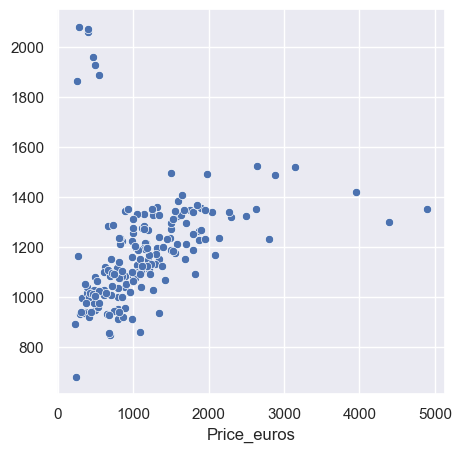

In [273]:
sns.set(rc={'figure.figsize':(5, 5)})
sns.scatterplot(x=y_test, y=predictions);

### Data scalation

In [219]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)
train_scaled = scaler.transform(X_train)
test_scaled = scaler.transform(X_test)

laptop_model_sc = LinearRegression()
laptop_model_sc.fit(X_train, y_train)

LinearRegression()

In [220]:
coeff_df = pd.DataFrame(laptop_model_sc.coef_,
                        X_train.columns,
                        columns=['Coefficient'])
coeff_df.sort_values('Coefficient', ascending=False)

,Coefficient
Ram,87.229922
TypeName,74.086480
Gpu2,43.652272
Gpu1,29.411146
OpSys,16.280051
Company,15.447830
Resolution1,0.000050
Memory2_1,-0.013904
Memory1_1,-0.176871
Memory1_2,-11.325177


In [221]:
predictions = laptop_model_sc.predict(test_scaled)
predictions

c:\Users\crist\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([1090.64468832, 1864.83839903,  911.04761201, 1236.43632591,
       1381.60124395, 1161.97331168, 1223.16232079, 1263.30172293,
        918.37022825, 1186.66093726, 1331.61167727,  947.53850779,
        997.43451917, 1210.03878198, 1331.30473441, 1323.07200505,
       1357.08022281, 1216.13284779, 1021.03757712,  932.01775805,
       1888.48139375, 2058.82267407, 1114.25467618, 1151.52343826,
       1041.36819668,  960.13906423, 1112.41441415, 1251.83257695,
       1074.42360495,  847.55528294, 1196.37288459, 1359.01145057,
        953.50206308, 1213.15022463, 1127.04879499,  938.72640252,
       1118.73347533, 1026.53563671, 1187.34154508,  954.99619514,
       1256.50615843, 1168.60327469,  936.03662499, 1229.47320457,
       1084.21318627,  931.67674503, 1098.08344935, 1006.06453857,
       1212.59971757, 1024.63705645, 1407.14410343,  998.2010887 ,
       1960.47615359, 1485.89509898, 1098.06259707, 1226.58713657,
       1294.85857058, 1333.12461338, 1349.92379112, 1337.86788

In [222]:
from sklearn.metrics import mean_squared_error
print("RMSE: ", np.sqrt(mean_squared_error(y_test, predictions)))

RMSE:  676.9392898018654
